# **성능관리**

## **1.환경준비**

### **(1) 라이브러리 로딩**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.backend import clear_session
from keras.optimizers import Adam
from keras.datasets import mnist

* 함수 만들기

In [2]:
# 학습곡선 함수
def dl_history_plot(history):
    plt.figure(figsize=(10,6))
    plt.plot(history['loss'], label='train_err', marker = '.')
    plt.plot(history['val_loss'], label='val_err', marker = '.')

    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.grid()
    plt.show()

### **(2) 데이터로딩**

* 데이터 로딩
    * 과적합을 위한 예제 데이터입니다.
    * target
    * feature : 0 ~ 299

In [13]:
path = "https://raw.githubusercontent.com/DA4BAM/dataset/master/overfit_sample.csv"
data = pd.read_csv(path)
data

,target,0,1,2,3,4,5,6,7,8,...,290,291,292,293,294,295,296,297,298,299
0,1,-1.067,-1.114,-0.616,0.376,1.090,0.467,-0.422,0.460,-0.443,...,0.220,-0.339,0.254,-0.179,0.352,0.125,0.347,0.436,0.958,-0.824
1,0,-0.831,0.271,1.716,1.096,1.731,-0.197,1.904,-0.265,0.557,...,-0.765,-0.735,-1.158,2.554,0.856,-1.506,0.462,-0.029,-1.932,-0.343
2,0,0.099,1.390,-0.732,-1.065,0.005,-0.081,-1.450,0.317,-0.624,...,-1.311,0.799,-1.001,1.544,0.575,-0.309,-0.339,-0.148,-0.646,0.725
3,1,-0.989,-0.916,-1.343,0.145,0.543,0.636,1.127,0.189,-0.118,...,-1.370,1.093,0.596,-0.589,-0.649,-0.163,-0.958,-1.081,0.805,3.401
4,0,0.811,-1.509,0.522,-0.360,-0.220,-0.959,0.334,-0.566,-0.656,...,-0.178,0.718,-1.017,1.249,-0.596,-0.445,1.751,1.442,-0.393,-0.643
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,1,-0.068,-0.184,-1.153,0.610,0.414,1.557,-0.234,0.950,0.896,...,1.492,1.430,-0.333,-0.200,-1.073,0.797,1.980,1.191,1.032,-0.402
246,0,-0.234,-1.373,-2.050,-0.408,-0.255,0.784,0.986,-0.891,-0.268,...,-0.996,0.678,1.395,0.714,0.215,-0.537,-1.267,-1.021,0.747,0.128
247,0,-2.327,-1.834,-0.762,0.660,-0.858,-2.764,-0.539,-0.065,0.549,...,-1.237,-0.620,0.670,-2.010,0.438,1.972,-0.379,0.676,-1.220,-0.855
248,1,-0.451,-0.204,-0.762,0.261,0.022,-1.487,-1.122,0.141,0.369,...,0.729,0.411,2.366,-0.021,0.160,0.045,0.208,-2.117,-0.546,-0.093


## **2. Early Stopping**

### **(1) 데이터 준비**

In [14]:
# 데이터분할 : x, y
target = 'target'
x = data.drop(target, axis = 1)
y = data.loc[:, target]

# 데이터분할 : train, validation
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=.2, random_state = 20)

In [15]:
# 스케일링
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)

### **(2) 모델링**

In [7]:
# input_shape : feature 수 도출
nfeatures = x_train.shape[1]

nfeatures

300

In [10]:
# 메모리 정리
clear_session()

# Sequential 타입
model1 = Sequential( [Dense(128, input_shape = (nfeatures,), activation= 'relu'),
                      Dense(64, activation= 'relu'),
                      Dense(32, activation= 'relu'),
                      Dense(1, activation= 'sigmoid')] ) # 이진 분류 모델

# 컴파일
model1.compile(optimizer= Adam(learning_rate = 0.001), loss='binary_crossentropy')

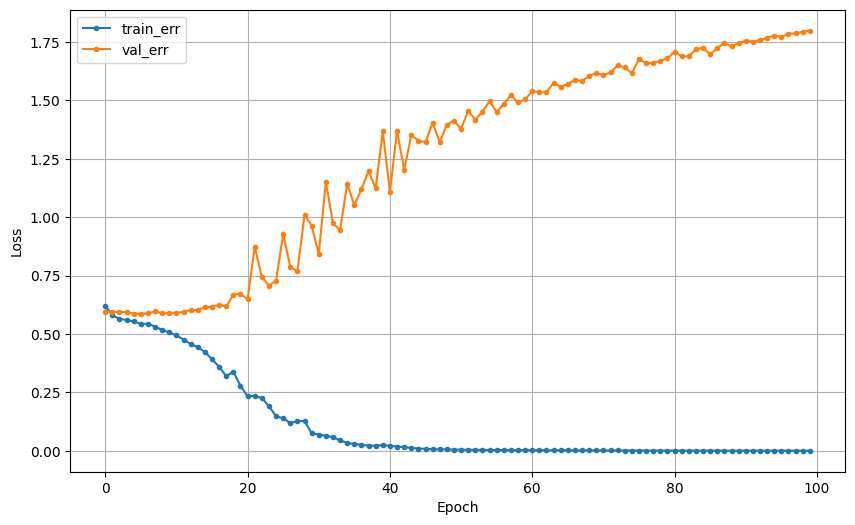

In [9]:
# 학습
hist = model1.fit(x_train, y_train, epochs = 100, validation_split=0.2, verbose = 0).history

# 학습결과 그래프
dl_history_plot(hist)

### **(3) 미리 멈춤!(Early Stopping)**

#### 1) 함수 불러오기

In [16]:
from keras.callbacks import EarlyStopping

#### 2) 모델링 with early stopping

Epoch 1/100
5/5 [==============================] - 1s 40ms/step - loss: 0.6618 - val_loss: 0.5971
Epoch 2/100
5/5 [==============================] - 0s 9ms/step - loss: 0.5715 - val_loss: 0.5861
Epoch 3/100
5/5 [==============================] - 0s 9ms/step - loss: 0.5688 - val_loss: 0.5832
Epoch 4/100
5/5 [==============================] - 0s 9ms/step - loss: 0.5589 - val_loss: 0.5796
Epoch 5/100
5/5 [==============================] - 0s 9ms/step - loss: 0.5486 - val_loss: 0.5817


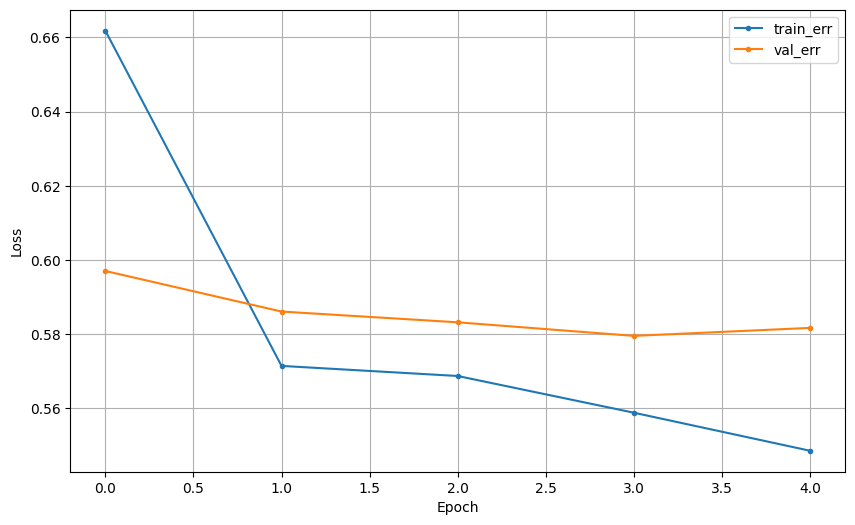

In [37]:
# 모델 선언
clear_session()

model2 = Sequential( [Dense(128, input_shape = (nfeatures,), activation= 'relu'),
                      Dense(64, activation= 'relu'),
                      Dense(32, activation= 'relu'),
                      Dense(1, activation= 'sigmoid')] )
model2.compile(optimizer= Adam(learning_rate = 0.001), loss='binary_crossentropy')

# EarlyStopping 설정 ------------
min_de = 0.01 # loss값이 min_de값보다 많이 줄어야 loss가 줄었다고 인정해줄 거야! (그래프 보고 값 결정)
pat = 3 # loss가 줄지 않아도 5번까진 참아줄게! (보통 3~5 사이의 값으로 줌)

es = EarlyStopping(monitor = 'val_loss', min_delta = min_de, patience = pat)
# --------------------------------

# 학습
hist = model2.fit(x_train, y_train, epochs = 100, validation_split=0.2,
                  callbacks = [es]).history
dl_history_plot(hist)

## **3.가중치 규제(Regularization)**

In [30]:
# 규제를 위해 필요한 함수 불러오기
from keras.regularizers import l1, l2

### **(1) L1 규제**

In [31]:
# 메모리 정리
clear_session()

# Sequential 타입
model4 = Sequential( [Dense(128, input_shape = (nfeatures,), activation= 'relu',
                            kernel_regularizer = l1(0.01)),
                      Dense(64, activation= 'relu',
                            kernel_regularizer = l1(0.01)),
                      Dense(32, activation= 'relu',
                            kernel_regularizer = l1(0.01)),
                      Dense(1, activation= 'sigmoid')] )

# 컴파일
model4.compile(optimizer= Adam(learning_rate = 0.001), loss='binary_crossentropy')

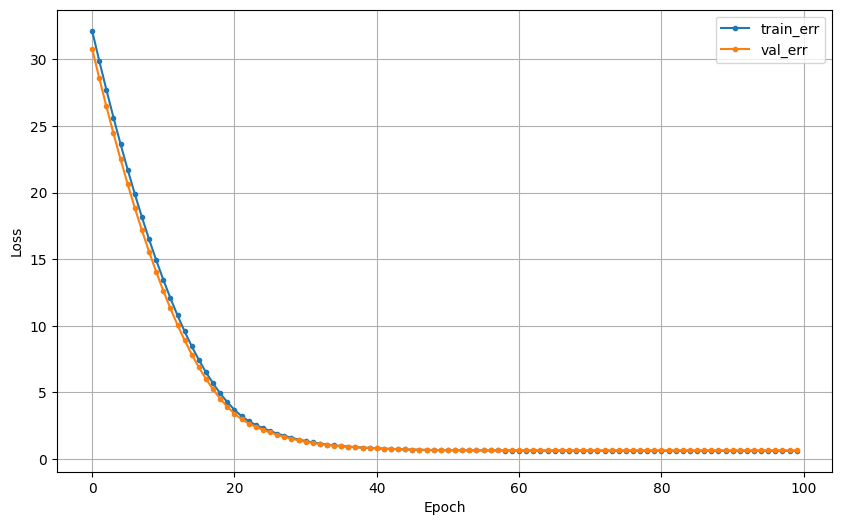

In [32]:
# 학습
hist = model4.fit(x_train, y_train, epochs = 100, validation_split=0.2, verbose = 0).history

# 학습결과 그래프
dl_history_plot(hist)

### **(2) L2 규제**

In [35]:
# 메모리 정리
clear_session()

# Sequential 타입
model5 = Sequential( [Dense(128, input_shape = (nfeatures,), activation= 'relu',
                            kernel_regularizer = l2(0.05)),
                      Dense(64, activation= 'relu',
                            kernel_regularizer = l2(0.05)),
                      Dense(32, activation= 'relu',
                            kernel_regularizer = l2(0.05)),
                      Dense(1, activation= 'sigmoid')] )

# 컴파일
model5.compile(optimizer= Adam(learning_rate = 0.001), loss='binary_crossentropy')

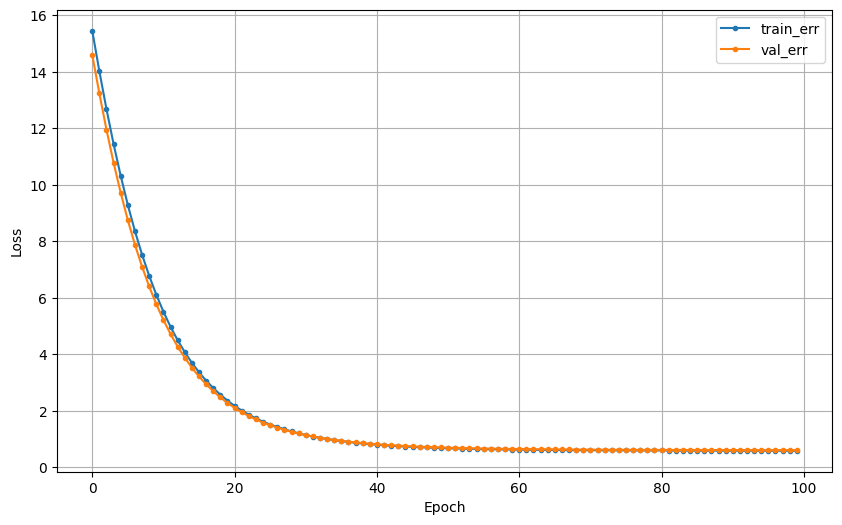

In [36]:
# 학습
hist = model5.fit(x_train, y_train, epochs = 100, validation_split=0.2, verbose = 0).history

# 학습결과 그래프
dl_history_plot(hist)

## 4.[참조]Dropout

In [38]:
from keras.layers import Dropout

### **(1) 적용 전**

In [39]:
# input_shape : feature 수 도출
nfeatures = x_train.shape[1]

# 메모리 정리
clear_session()

# Sequential 타입
model1 = Sequential( [Dense(128, input_shape = (nfeatures,), activation= 'relu'),
                      Dense(64, activation= 'relu'),
                      Dense(32, activation= 'relu'),
                      Dense(1, activation= 'sigmoid')] )

# 컴파일
model1.compile(optimizer= Adam(learning_rate = 0.001), loss='binary_crossentropy')

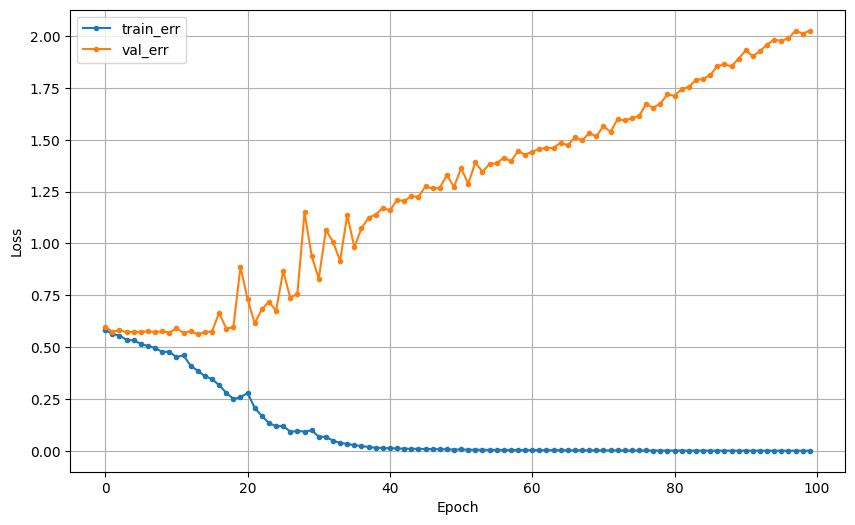

In [40]:
# 학습
hist = model1.fit(x_train, y_train, epochs = 100, validation_split=0.2, verbose = 0).history

# 학습결과 그래프
dl_history_plot(hist)

### **(2) 적용 후**

In [41]:
# 메모리 정리
clear_session()

# Sequential 타입
model3 = Sequential( [Dense(128, input_shape = (nfeatures,), activation= 'relu'),
                      Dropout(0.4),
                      Dense(64, activation= 'relu'),
                      Dropout(0.4),
                      Dense(32, activation= 'relu'),
                      Dropout(0.4),
                      Dense(1, activation= 'sigmoid')] )

# 컴파일
model3.compile(optimizer= Adam(learning_rate = 0.001), loss='binary_crossentropy')

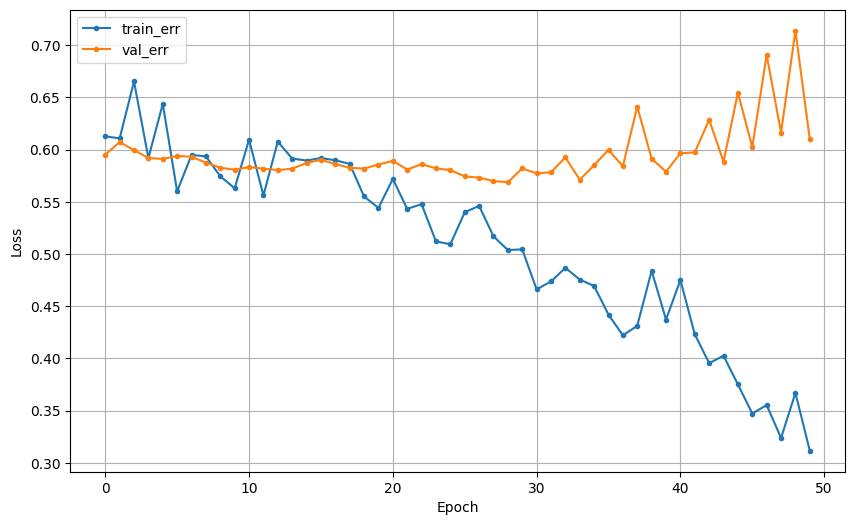

In [42]:
# 학습
hist = model3.fit(x_train, y_train, epochs = 50, validation_split=0.2, verbose = 0).history

# 학습결과 그래프
dl_history_plot(hist)

## 5.모델 저장하기

### (1) 모델 저장하기

* model.save(‘파일이름.h5’)
    * 딥러닝 모델의 메소드로 .save가 제공됩니다.
    * 파일이름.h5 파일이 저장됩니다. (h5 파일 포맷 : 하둡파일 형식)

In [43]:
model1.save('hanky.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


* 저장된 파일은 왼쪽 '파일'탭에서 확인 가능
* 파일을 다운로드 받을 수 있다.

### (2) 모델 로딩하기

* load_model 함수는 별도로 불러와야 합니다.
* 경로를 맞춰주고 h5 파일을 읽어오면 그대로 사용 가능합니다.
* 머신러닝 모델은 joblib의 piklib이용해 저장함. 물론 딥러닝 모델도 그 방법으로 저장 가능!

In [44]:
from keras.models import load_model
model2 = load_model('hanky.h5')

* 불러온 모델 사용하기

In [57]:
pred2 = model2.predict(x_val) # x_val은 학습한 데이터 구조와 같아야 함 (열이 같아야 함!)

2/2 [==============================] - 0s 10ms/step


In [54]:
pred2[:5]

array([[8.9513160e-06],
       [1.2007448e-02],
       [9.5427239e-01],
       [1.0017771e-05],
       [3.5197532e-05]], dtype=float32)

In [55]:
pred2_1 = np.where(pred2>.5, 1, 0)

In [56]:
print(accuracy_score(y_val,pred2_1))
print('-'*60)
print(confusion_matrix(y_val, pred2_1))
print('-'*60)
print(classification_report(y_val, pred2_1))

0.68
------------------------------------------------------------
[[33  2]
 [14  1]]
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.70      0.94      0.80        35
           1       0.33      0.07      0.11        15

    accuracy                           0.68        50
   macro avg       0.52      0.50      0.46        50
weighted avg       0.59      0.68      0.60        50



### (3) 중간 체크포인트에 모델 저장하기

* 폴더 정리 : 위에서 저장한 파일들 제거하기

In [2]:
import os

def delete_h5_files(directory):
    for filename in os.listdir(directory):
        if filename.endswith(".h5"):
            file_path = os.path.join(directory, filename)
            try:
                os.remove(file_path)
                print(f"Deleted: {file_path}")
            except Exception as e:
                print(f"Error deleting {file_path}: {e}")

# 삭제할 디렉토리 지정
directory_to_delete_from = "/content/"

# 확장자가 .h5인 파일 삭제
delete_h5_files(directory_to_delete_from)


#### 1) 체크포인트 함수 불러오기

In [59]:
from keras.callbacks import ModelCheckpoint

#### 2) 모델링 체크포인트 저장

* 모델 선언

In [60]:
# input_shape : feature 수 도출
nfeatures = x_train.shape[1]

# 메모리 정리
clear_session()

# Sequential 타입
model1 = Sequential( [Dense(64, input_shape = (nfeatures,), activation= 'relu'),
                      Dense(32, activation= 'relu'),
                      Dense(16, activation= 'relu'),
                      Dense(1, activation= 'sigmoid')] )

# 컴파일
model1.compile(optimizer= Adam(learning_rate = 0.0001), loss='binary_crossentropy')

* 체크포인트 저장
    * 아래 코드에서 ModelCheckpoint 콜백은 val_loss를 기준으로 모델 저장
    * 모델의 성능이 이전에 저장된 모델보다 향상될 때만 저장되도록 save_best_only=True로 설정
    * 또한, verbose=1로 설정하면 모델이 저장될 때마다 콘솔에 메시지가 표시됨.

In [61]:
cp_path = '/content/{epoch:03d}.h5'
mcp = ModelCheckpoint(cp_path, monitor='val_loss', verbose = 1, save_best_only=True)

# 학습
hist = model1.fit(x_train, y_train, epochs = 50, validation_split=.2, callbacks=[mcp]).history

Epoch 1/50
1/5 [=====>........................] - ETA: 4s - loss: 0.5593
Epoch 1: val_loss improved from inf to 0.60964, saving model to /content/001.h5
5/5 [==============================] - 1s 52ms/step - loss: 0.6183 - val_loss: 0.6096
Epoch 2/50
1/5 [=====>........................] - ETA: 0s - loss: 0.6161
Epoch 2: val_loss improved from 0.60964 to 0.59505, saving model to /content/002.h5
5/5 [==============================] - 0s 15ms/step - loss: 0.5951 - val_loss: 0.5950
Epoch 3/50
1/5 [=====>........................] - ETA: 0s - loss: 0.6009
Epoch 3: val_loss improved from 0.59505 to 0.58719, saving model to /content/003.h5
5/5 [==============================] - 0s 14ms/step - loss: 0.5791 - val_loss: 0.5872
Epoch 4/50
1/5 [=====>........................] - ETA: 0s - loss: 0.5888

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 4: val_loss improved from 0.58719 to 0.58330, saving model to /content/004.h5
5/5 [==============================] - 0s 14ms/step - loss: 0.5704 - val_loss: 0.5833
Epoch 5/50
1/5 [=====>........................] - ETA: 0s - loss: 0.5806
Epoch 5: val_loss improved from 0.58330 to 0.58315, saving model to /content/005.h5
5/5 [==============================] - 0s 14ms/step - loss: 0.5676 - val_loss: 0.5832
Epoch 6/50
1/5 [=====>........................] - ETA: 0s - loss: 0.4862
Epoch 6: val_loss did not improve from 0.58315
5/5 [==============================] - 0s 9ms/step - loss: 0.5650 - val_loss: 0.5845
Epoch 7/50
1/5 [=====>........................] - ETA: 0s - loss: 0.5182
Epoch 7: val_loss did not improve from 0.58315
5/5 [==============================] - 0s 9ms/step - loss: 0.5633 - val_loss: 0.5855
Epoch 8/50
1/5 [=====>........................] - ETA: 0s - loss: 0.5848
Epoch 8: val_loss did not improve from 0.58315
5/5 [==============================] - 0s 9ms/step - los

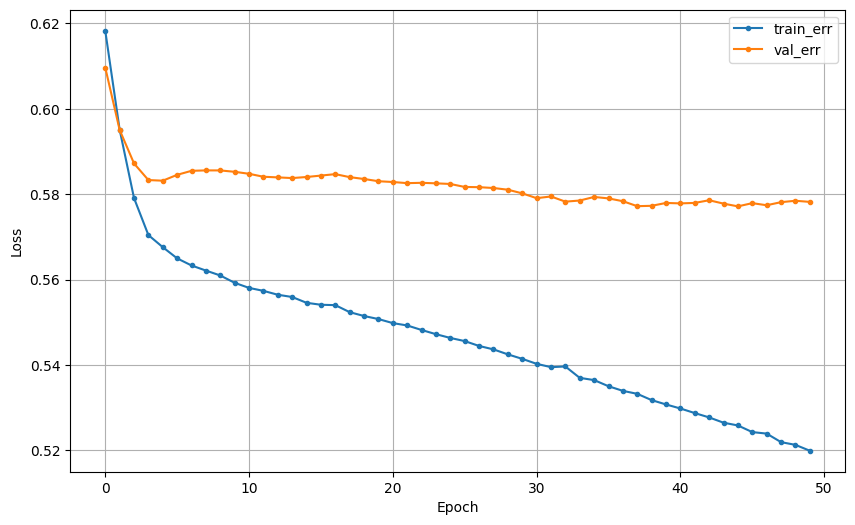

In [62]:
# 학습결과 그래프
dl_history_plot(hist)